In [39]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [40]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib


In [41]:
#Load images dir

data_dir = pathlib.Path("../datasets/sign_lang/")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
A = list(data_dir.glob('A/*'))
B = list(data_dir.glob('B/*'))
C = list(data_dir.glob('C/*'))
D = list(data_dir.glob('D/*'))
E = list(data_dir.glob('E/*'))
F = list(data_dir.glob('F/*'))
G = list(data_dir.glob('G/*'))
H = list(data_dir.glob('H/*'))
I = list(data_dir.glob('I/*'))
J = list(data_dir.glob('J/*'))
K = list(data_dir.glob('K/*'))
L = list(data_dir.glob('L/*'))
M = list(data_dir.glob('M/*'))
N = list(data_dir.glob('N/*'))
O = list(data_dir.glob('O/*'))
P = list(data_dir.glob('P/*'))
Q = list(data_dir.glob('Q/*'))
R = list(data_dir.glob('R/*'))
S = list(data_dir.glob('S/*'))
T = list(data_dir.glob('T/*'))
U = list(data_dir.glob('U/*'))
V = list(data_dir.glob('V/*'))
W = list(data_dir.glob('W/*'))
X = list(data_dir.glob('X/*'))
Y = list(data_dir.glob('Y/*'))
Z = list(data_dir.glob('Z/*'))



390


In [1]:
#Define some default variables

batch_size = 10 #total of 2
img_height = 512
img_width = 512

In [43]:
#Create training dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.34,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 390 files belonging to 26 classes.
Using 258 files for training.


In [44]:
#Create test dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.34,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 390 files belonging to 26 classes.
Using 132 files for validation.


In [45]:
#Define number of classes
classes = train_ds.class_names
lenClasses = len(classes)

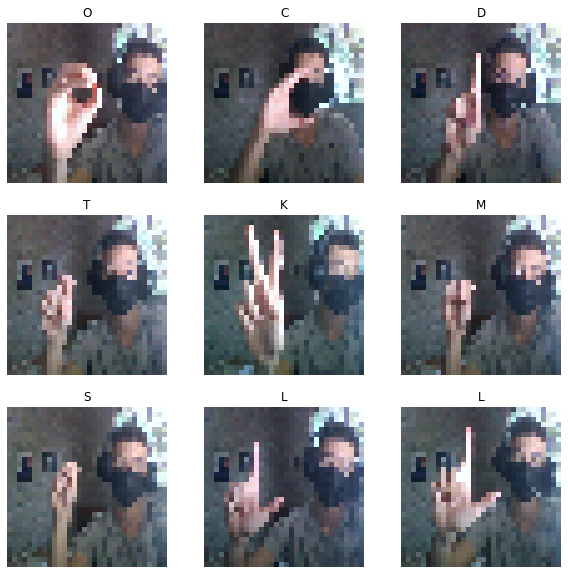

In [46]:
#Visualize data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

In [47]:
# There are some ways to improve the NN performance by making some changes to the dataset

#Here's one of them
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [48]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [35]:
#Test on a default model

#Build
model = tf.keras.Sequential()

model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1024, activation='sigmoid'))
model.add(tf.keras.layers.Dense(lenClasses, activation='softmax'))

#Compile
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy', f1_metric])

#Train
Nepochs = 15
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=Nepochs
)

#Test
results = model.evaluate(val_ds)
print(f"Results with {Nepochs} training epochs:")
print(f"Accuracy: {results[1]}")

Epoch 1/15


AttributeError: in user code:

    File "/home/chagu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_45369/187972753.py", line 4, in f1_metric  *
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    AttributeError: 'list' object has no attribute 'sum'


In [38]:
#test with model built for this structure

#Build

model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(lenClasses)
])
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy', f1_score])

Nepochs = 15
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=Nepochs
)

results = model2.evaluate(val_ds)
print(f"Results with {Nepochs} training epochs:")
print(f"Accuracy: {results[1]}")
print(f"F1-score: {results[2]}")

NameError: name 'f1_score' is not defined

In [15]:
#Build

model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(lenClasses)
])
model2.compile(
  optimizer='adam',
  #loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy', f1_metric])

Nepochs = 10
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=Nepochs
)

results = model2.evaluate(val_ds)
print(f"Results with {Nepochs} training epochs:")
print(f"Accuracy: {results[1]}")
print(f"F1-score: {results[2]}")


Epoch 1/10


AttributeError: in user code:

    File "/home/chagu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_45369/187972753.py", line 4, in f1_metric  *
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    AttributeError: 'list' object has no attribute 'sum'
